### Logistic Regression

Logistic Regression is a statistical method used in machine learning to predict the positive or negative value of a dependent variable based on one or more independent variables. In Logistic Regression, the dependent variable is modeled using the logistic function, which maps continuous inputs to a binary output.

The Logistic Regression model estimates the coefficients of the independent variables that maximise the likelihood of the observed data given the model parameters. The model is trained to minimise the difference between the predicted probabilities and the actual binary outcomes of the data. A threshold can also be set on the predicted probabilities. Any probability greater than the threshold is classified as positive and any probability less than the threshold is classified as negative.


In [46]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Variables

From our Exploratory Data Analysis, we identified 6 variables that are significantly correlated with hypertension. 

For Logistic Regression, categorical values (strings) have to be converted into numerical values to be processed.

In [47]:
# Loading cleaned data set
Dataset = pd.read_csv('./Data/Final_Data.csv')
Dataset.drop(columns=Dataset.columns[0], axis=1, inplace=True)
Dataset.head()

,Hypertension,Diabetes,Overall Health,BMI Category,Have CHD/MI,High Cholesterol,Income
0,No,No,Fair or poor health,Underweight,No,Yes,25000 to < 35000
1,Yes,Yes,Good or better health,Overweight,Yes,No,15000 to < 25000
2,Yes,Yes,Good or better health,Obese,No,Yes,50000 to < 100000
3,No,Yes,Fair or poor health,Overweight,Yes,Yes,15000 to < 25000
4,No,No,Good or better health,Normal,No,No,35000 to < 50000


In [48]:
# Creating dataframe with only significant independent variables
hypertension_dataset = Dataset.copy()                     
hypertension_dataset.drop(['Income'],inplace=True, axis=1)
hypertension_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186125 entries, 0 to 186124
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Hypertension      186125 non-null  object
 1   Diabetes          186125 non-null  object
 2   Overall Health    186125 non-null  object
 3   BMI Category      186125 non-null  object
 4   Have CHD/MI       186125 non-null  object
 5   High Cholesterol  186125 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [49]:
# Changing every values to numeric values for Logistic Regression

for ind in hypertension_dataset.index:
    if hypertension_dataset.loc[ind, 'Have CHD/MI'] == 1.0:
        hypertension_dataset.loc[ind, 'Have CHD/MI'] = 1
    elif hypertension_dataset.loc[ind, 'Have CHD/MI'] == 2.0: 
        hypertension_dataset.loc[ind, 'Have CHD/MI'] = 0

# Decode BMI Category
hypertension_dataset.replace("Underweight", 1, inplace = True)
hypertension_dataset.replace("Normal", 2, inplace = True)
hypertension_dataset.replace("Overweight", 3, inplace = True)
hypertension_dataset.replace("Obese", 4, inplace = True)

# Decode BMI Category
hypertension_dataset.replace("Good or better health", 1, inplace = True)
hypertension_dataset.replace("Fair or poor health", 2, inplace = True)

hypertension_dataset.replace("Yes", 1, inplace = True)
hypertension_dataset.replace("No", 0, inplace = True)

In [50]:
# Check if variable data has been changed to type int
hypertension_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186125 entries, 0 to 186124
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Hypertension      186125 non-null  int64
 1   Diabetes          186125 non-null  int64
 2   Overall Health    186125 non-null  int64
 3   BMI Category      186125 non-null  int64
 4   Have CHD/MI       186125 non-null  int64
 5   High Cholesterol  186125 non-null  int64
dtypes: int64(6)
memory usage: 8.5 MB


In [51]:
# Load Dataset to confirm chabges has been made
hypertension_dataset.head()

,Hypertension,Diabetes,Overall Health,BMI Category,Have CHD/MI,High Cholesterol
0,0,0,2,1,0,1
1,1,1,1,3,1,0
2,1,1,1,4,0,1
3,0,1,2,3,1,1
4,0,0,1,2,0,0


In [52]:
# Isolate dependent variable to fit into the model
labels = hypertension_dataset.pop("Hypertension")

### Train and Test Set

Our data set will be randomly split into two sets with 80% of the data forming the train set and the remaining 20% forming the test set.

The train set will be fitted into the parameters of Logistic Regression where the coefficients of the model are adjusted to minimise the difference between the predicted and the actual values for hypertension based on the given independent variables.

The test set is then used to evaluate the performance of the trained model to simulate how well the model can make predictions for hypertension on new and unseen data.

The train and test sets are kept completely separate to avoid overfitting the model to the train data. Overfitting occurs when the model makes predictions based on memory of data in the train set rather than trends, which causes it to perform poorly on new data. By evaluating the performance of the model on a separate test set, a better estimate is returned.

In [53]:
# Split data randomly into 80% train set and 20% test set
x_train, x_test, y_train, y_test = train_test_split(hypertension_dataset, labels, test_size = 0.20, random_state=9999)

In [54]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression(max_iter=200000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=200000)

In [55]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[1.05648817 0.56828262 0.4359949  1.02127167 0.94150834]]
[-2.99043816]


In [56]:
# Perform prediction using the train dataset
y_train_pred = log_reg.predict(x_train)

In [57]:
# Perform prediction using the test dataset
y_test_pred = log_reg.predict(x_test)

<h1>Confusion Matrix</h1>

The confusion matrix allows us to evaluate the performance of a classification model by summarising the predicted and actual values of the test data to determine the accuracy of its predictions.

The TPR can be found by dividing the true positives identified by the total actual positives. The FPR can be found by divding the false positives identified by the total actual negatives. Comparing the TPR and FPR gives us an indication of how well the model can correctly identify whether an individual has hypertension based on the individual's factors.

For Logistic Regression, the accuracy of the model can be determined by how well the model is able to correctly identify its predictions. This can be found by dividing the sum of true positives and true negatives by the total number of predictions, which gives us the rate of correct predictions on the test set.

<Axes: >

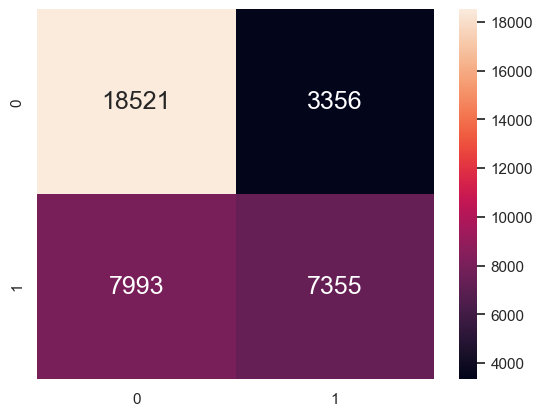

In [58]:
# Show the Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [59]:
# Check the Goodness of Fit (on Train Data)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()

tpr_train = tp_train / (fn_train + tp_train)
fpr_train = fp_train / (fp_train + tn_train)
accuracy_train = (tp_train + tn_train)/(tp_train + tn_train + fp_train + fn_train)
print("Goodness of Fit of Model \t:Train Dataset")
print("True positive rate \t=", tpr_train)
print("False positive rate \t=", fpr_train)
print("Accuracy of train \t=", accuracy_train)

print()
# Check the Goodness of Fit (on Test Data)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

tpr_test = tp_test / (fn_test + tp_test)
fpr_test = fp_test / (fp_test + tn_test)
accuracy_test = (tp_test + tn_test)/(tp_test + tn_test + fp_test + fn_test)
print("Goodness of Fit of Model \t:Test Dataset")
print("True positive rate \t=", tpr_test)
print("False positive rate \t=", fpr_test)
print("Accuracy of test \t=", accuracy_test)

Goodness of Fit of Model 	:Train Dataset
True positive rate 	= 0.4684678801730471
False positive rate 	= 0.1503907809914998
Accuracy of train 	= 0.6928139691067831

Goodness of Fit of Model 	:Test Dataset
True positive rate 	= 0.4792155329684649
False positive rate 	= 0.1534031174292636
Accuracy of test 	= 0.6951242444593687


<h1>Hyperparameter Optimisation</h1>

The Logistic Regression model can be further optimised by setting certain parameters that are not learned from the data. These parameters are known as hyperparameters. The most suitable hyperparameters for the model are chosen by trial and error to find the best values.

The hyperparameters we considered are:

1. <b>C</b>: The strength of the regularisation applied to the model. Regularisation helps to prevent overfitting by penalising large coefficients in the model. A high value of C reduces the amount of regularisation and may lead to overfitting, while a low value of C increases the regularisation and may lead to underfitting. A range of C values from 0.1 to 1 will be tested to ensure sufficient breadth and low C value.


2. <b>penalty</b>: There are two penalty hyperparameters L1 (Lasso) and L2 (Ridge). L1 is used to reduce the number of input variables, while L2 is used when all the variables are important and we want to avoid overfitting. Since we have identified only the variables with significant correlation to hypertension, only L2 penalty will be used.


3. <b>solver</b>: There are different solvers that can be used to optimise the Logistic Regression model. The choice of solver can affect the convergence speed and accuracy of the model. "lbfgs" is used for its good convergence properties, efficient use of memory, and ability to handle large datasets. "sag" optimises the loss function by updating the coefficients based on a randomly selected subset of the training datawill be tested, and is efficient for large datasets. These two solvers are suitable as our dataset with over 70,000 data points is considered large.


4. <b>max_iter</b>: The max number of iterations needed for the Logistic Regression to converge and produce an accurate solution. A sufficiently large value for the max iteration hyperparameter is needed to ensure that the algorithm has enough time to converge. However, a value too large can cause performance or computational issues, and hence an optimal number of iterations is needed.

In [60]:
# Specify the chosen hyperparameters for the Logistic Regression
param_grid = [    
    {'penalty' : ['l2'],
    'C' : np.arange(0.1, 1.0, 0.1),
    'solver' : ['lbfgs','sag'],
    # 'max_iter' : [list(range(1,10001))]
    'max_iter' : [500, 1000, 5000, 10000]

    }
]

In [61]:
# Grid search builds a model for every combination of the hyperparameters specified and evaluates each model
# This gives us a comprehensive evaluation of the best hyperparameters to optimise prediction accuracy
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [62]:
# clf is used to store trained model values and find the best hyperparameter fit
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [63]:
# Find the best hyperparameters
best_clf.best_estimator_

LogisticRegression(C=0.1, max_iter=500)

<h1>Final Logistic Regression Model</h1>

We will fit the Logistic Regression model using the best hyperparameters (C=0.9, max_iter=500) to create our final model. The confusion matrix will be generated again and compared with the previous confusion matrix to identify if the new model is able to identify the test data more accurately. Finally, the accuracy of the old and new model will be compared to see if there is any significant improvement to the prediction accuracy after optimisation.

In [64]:
# Fit logistic regression model with best hyperparameters
log_reg = LogisticRegression(C=0.9, max_iter=500)
log_reg.fit(x_train, y_train)

LogisticRegression(C=0.9, max_iter=500)

<Axes: >

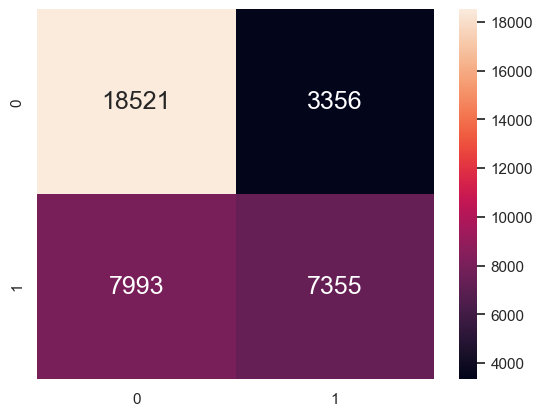

In [65]:
# Perform prediction using the train dataset
y_train_pred = log_reg.predict(x_train)

# Perform prediction using the test dataset
y_test_pred = log_reg.predict(x_test)

# Show the Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [66]:
# Check the Goodness of Fit (on Train Data)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()

tpr_train = tp_train / (fn_train + tp_train)
fpr_train = fp_train / (fp_train + tn_train)
accuracy_train = (tp_train + tn_train)/(tp_train + tn_train + fp_train + fn_train)
print("Goodness of Fit of Model \t:Train Dataset")
print("True positive rate \t=", tpr_train)
print("False positive rate \t=", fpr_train)
print("Accuracy of train \t=", accuracy_train)

print()
# Check the Goodness of Fit (on Test Data)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

tpr_test = tp_test / (fn_test + tp_test)
fpr_test = fp_test / (fp_test + tn_test)
accuracy_test = (tp_test + tn_test)/(tp_test + tn_test + fp_test + fn_test)
print("Goodness of Fit of Model \t:Test Dataset")
print("True positive rate \t=", tpr_test)
print("False positive rate \t=", fpr_test)
print("Accuracy of test \t=", accuracy_test)

Goodness of Fit of Model 	:Train Dataset
True positive rate 	= 0.4684678801730471
False positive rate 	= 0.1503907809914998
Accuracy of train 	= 0.6928139691067831

Goodness of Fit of Model 	:Test Dataset
True positive rate 	= 0.4792155329684649
False positive rate 	= 0.1534031174292636
Accuracy of test 	= 0.6951242444593687


### Prediction Accuracy Findings

From the provided information about the test dataset, the following observations can be made:

True Positive Rate: The true positive rate is approximately 0.4792. This means that the model correctly identified around 47.92% of the positive cases.

False Positive Rate: The false positive rate is approximately 0.1534. This indicates that the model incorrectly classified around 15.34% of the negative cases in the test dataset as positive.

Accuracy: The accuracy of the model on the test dataset is approximately 0.6951 or 69.51%. This means that the model correctly predicted the outcome 69.51% of the cases in the test dataset.

Based on these results, it can be concluded that the overall accuracy of the model is moderate, indicating that it is able to predict the outcome correctly for a significant portion of the test dataset.